# 57b. Introduction to data science.
# Data manipulations with Python modules

# 57b. Introducción a la ciencia de datos.
# Manipulaciones de datos con módulos de Python

- [NumPy documentation](https://numpy.org/doc/stable/)
- [pandas documentation](https://pandas.pydata.org/docs/)
- [polars API reference](https://pola-rs.github.io/polars/py-polars/html/reference/index.html)
- [datatable User Guide](https://datatable.readthedocs.io/en/latest/manual/index-manual.html#user-guide)
- [modin Usage Guide](https://modin.readthedocs.io/en/stable/usage_guide/index.html)
- [Vaex docs](https://vaex.io/docs/index.html)
- [CuPy](https://docs.cupy.dev/en/stable/)

In [44]:
!pip install -Iv -q polars==0.19.19

  Using cached polars-0.19.19-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (28.5 MB)


In [45]:
import polars as po, pandas as pd, numpy as np
import random, datetime, pylab as pl, plotly.express as px
po.show_versions()

--------Version info---------
Polars:               0.19.19
Index type:           UInt32
Platform:             Linux-6.1.58+-x86_64-with-glibc2.35
Python:               3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]

----Optional dependencies----
adbc_driver_manager:  <not installed>
cloudpickle:          2.2.1
connectorx:           <not installed>
deltalake:            <not installed>
fsspec:               2023.6.0
gevent:               <not installed>
matplotlib:           3.7.1
numpy:                1.23.5
openpyxl:             3.1.2
pandas:               1.5.3
pyarrow:              10.0.1
pydantic:             1.10.13
pyiceberg:            <not installed>
pyxlsb:               <not installed>
sqlalchemy:           2.0.23
xlsx2csv:             <not installed>
xlsxwriter:           <not installed>


In [46]:
%%writefile example.csv
id,name,position,department,age,gender,salary,start_date,email,phone
f01,John Smith,HR Manager,Human Resources,35,Male,60000,2015-03-15,john.smith@example.com,123-456-7890
f02,Emily Johnson,Marketing Specialist,Marketing,28,Female,45000,2017-09-22,emily.johnson@example.com,234-567-8901
f03,Michael Williams,Software Engineer,Engineering,30,Male,75000,2018-01-10,michael.williams@example.com,345-678-9012
f04,Sophia Brown,Financial Analyst,Finance,32,Female,58000,2016-05-18,sophia.brown@example.com,456-789-0123
f05,William Jones,Sales Representative,Sales,29,Male,48000,2019-11-04,william.jones@example.com,567-890-1234
f06,Olivia Davis,Administrative Assistant,Admin,26,Female,38000,2020-07-12,olivia.davis@example.com,678-901-2345
f07,Alexander Miller,Marketing Manager,Marketing,38,Male,68000,2014-02-28,alexander.miller@example.com,789-012-3456
f08,Mia Wilson,Network Administrator,IT,33,Female,65000,2017-08-05,mia.wilson@example.com,890-123-4567
f09,Daniel Taylor,Accountant,Finance,31,Male,55000,2019-03-25,daniel.taylor@example.com,901-234-5678
f10,Isabella Moore,Project Manager,Project Management,34,Female,70000,2016-11-15,isabella.moore@example.com,012-345-6789
f11,Ethan Anderson,Software Developer,Engineering,27,Male,60000,2018-04-30,ethan.anderson@example.com,123-456-7890
f12,Chloe Lee,HR Coordinator,Human Resources,29,Female,42000,2020-06-08,chloe.lee@example.com,234-567-8901
f13,James Garcia,Sales Manager,Sales,37,Male,72000,2015-09-14,james.garcia@example.com,345-678-9012
f14,Natalie Rodriguez,Data Analyst,IT,31,Female,56000,2017-02-12,natalie.rodriguez@example.com,456-789-0123
f15,Andrew Martinez,Operations Manager,Operations,36,Male,69000,2016-03-20,andrew.martinez@example.com,567-890-1234
f16,Grace Hernandez,Executive Assistant,Admin,27,Female,45000,2019-08-10,grace.hernandez@example.com,678-901-2345
f17,Lucas Gonzales,Quality Assurance Specialist,Engineering,29,Male,52000,2018-12-04,lucas.gonzales@example.com,789-012-3456
f18,Avery Perez,Financial Manager,Finance,40,Female,80000,2013-06-18,avery.perez@example.com,890-123-4567
f19,Henry Turner,Customer Service Representative,Customer Service,25,Male,40000,2020-11-30,henry.turner@example.com,901-234-5678
f20,Samantha Scott,Marketing Coordinator,Marketing,31,Female,48000,2017-04-15,samantha.scott@example.com,012-345-6789

Overwriting example.csv


## `polars` & `pandas`

In [47]:
example_po = po.read_csv('example.csv', try_parse_dates=True)\
.with_columns(po.col('age').cast(po.Int32))
example_po.head(3)

id,name,position,department,age,gender,salary,start_date,email,phone
str,str,str,str,i32,str,i64,date,str,str
"""f01""","""John Smith""","""HR Manager""","""Human Resource…",35,"""Male""",60000,2015-03-15,"""john.smith@exa…","""123-456-7890"""
"""f02""","""Emily Johnson""","""Marketing Spec…","""Marketing""",28,"""Female""",45000,2017-09-22,"""emily.johnson@…","""234-567-8901"""
"""f03""","""Michael Willia…","""Software Engin…","""Engineering""",30,"""Male""",75000,2018-01-10,"""michael.willia…","""345-678-9012"""


In [48]:
example_pd = pd.read_csv('example.csv', parse_dates=True)
example_pd['age'] = example_pd['age'].astype('int32')
display(example_pd.head(3))
example_pd.info()

,id,name,position,department,age,gender,salary,start_date,email,phone
0,f01,John Smith,HR Manager,Human Resources,35,Male,60000,2015-03-15,john.smith@example.com,123-456-7890
1,f02,Emily Johnson,Marketing Specialist,Marketing,28,Female,45000,2017-09-22,emily.johnson@example.com,234-567-8901
2,f03,Michael Williams,Software Engineer,Engineering,30,Male,75000,2018-01-10,michael.williams@example.com,345-678-9012


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20 non-null     object
 1   name        20 non-null     object
 2   position    20 non-null     object
 3   department  20 non-null     object
 4   age         20 non-null     int32 
 5   gender      20 non-null     object
 6   salary      20 non-null     int64 
 7   start_date  20 non-null     object
 8   email       20 non-null     object
 9   phone       20 non-null     object
dtypes: int32(1), int64(1), object(8)
memory usage: 1.6+ KB


In [49]:
sample_po = po.scan_csv("example.csv")\
.select(["name", "age", "gender", "salary"])\
.filter(po.col("age") > 30).fetch(10)
sample_po

name,age,gender,salary
str,i64,str,i64
"""John Smith""",35,"""Male""",60000
"""Sophia Brown""",32,"""Female""",58000
"""Alexander Mill…",38,"""Male""",68000
"""Mia Wilson""",33,"""Female""",65000
"""Daniel Taylor""",31,"""Male""",55000
"""Isabella Moore…",34,"""Female""",70000
"""James Garcia""",37,"""Male""",72000
"""Natalie Rodrig…",31,"""Female""",56000
"""Andrew Martine…",36,"""Male""",69000


In [50]:
sample_pd = pd.read_csv("example.csv")[["name", "age", "gender", "salary"]]
sample_pd = sample_pd[sample_pd['age'] > 30].head(10)
sample_pd

,name,age,gender,salary
0,John Smith,35,Male,60000
3,Sophia Brown,32,Female,58000
6,Alexander Miller,38,Male,68000
7,Mia Wilson,33,Female,65000
8,Daniel Taylor,31,Male,55000
9,Isabella Moore,34,Female,70000
12,James Garcia,37,Male,72000
13,Natalie Rodriguez,31,Female,56000
14,Andrew Martinez,36,Male,69000
17,Avery Perez,40,Female,80000


In [51]:
example_dict = {"wOrD_ID": [1, 2, 3, 4, 5],
                "SenTEnCe": ["this", "is", "hard", "to", "read"]}
example_dict_po = po.DataFrame(example_dict)
example_dict_po.write_csv('example_dict.csv')
po.scan_csv(
    'example_dict.csv',
    with_column_names=lambda cols: [col.lower() for col in cols]
).collect()

word_id,sentence
i64,str
1,"""this"""
2,"""is"""
3,"""hard"""
4,"""to"""
5,"""read"""


In [52]:
example_dict_pd = pd.DataFrame(example_dict)
example_dict_pd.to_csv('example_dict.csv', index=False)
example_dict_pd = pd.read_csv(
    'example_dict.csv', header=0,
    names=[col.lower() for col in example_dict_pd.columns])
example_dict_pd

,word_id,sentence
0,1,this
1,2,is
2,3,hard
3,4,to
4,5,read


Objects of `polars` || Objetos de `polars`

In [53]:
randi = {
    'int': lambda: random.randint(0, 100),
    'float': lambda: random.uniform(0, 100),
    'chr': lambda: random.choices('abcdefghijklmnopqrstuvwxyz')[0],
    'int_list': lambda: random.sample(range(100), random.randint(1, 10)),
    'int_tuple': lambda: tuple(random.sample(range(100), random.randint(1, 10))),
    'float_list': lambda: [round(random.uniform(0, 100), 2)
                           for _ in range(random.randint(1, 10))],
    'bool': lambda: random.choice([True, False]),
    'none': lambda: None,
    'date': lambda: str(datetime.date(1970, 1, 1) +
                        datetime.timedelta(random.randint(1, 60*365))),
    'numpy_nan': lambda: np.nan,
    'numpy_int64': lambda: np.int64(random.randint(0, 100)),
    'numpy_float64': lambda: np.float64(random.uniform(0, 100)),
    'polars_null': lambda: po.Null,
    'polars_unknown': lambda: po.Unknown,
}
def random_list(start=3, end=10, random_dict=randi, seed=12, choice=None):
    random.seed(seed)
    if choice == None:
        choice = list(random_dict.keys())
    elif not isinstance(choice, list):
        choice = [choice]
    return [random_dict[random.choice(choice)]()
            for _ in range(random.randint(start, end))]

`1D - Series`

In [54]:
s_obj = po.Series("random types", random_list(start=4, end=12, seed=12),
                  dtype=po.Object)
s_lst_int = po.Series("random lists",
                  random_list(start=4, end=5, seed=15,
                              choice=['int_list', 'float_list']))
s_lst_float = po.Series("random lists",
                  random_list(start=4, end=5, seed=13,
                              choice=['int_list', 'float_list']))
display(s_obj, s_lst_int, s_lst_float)

random types
object
"(85, 44, 18, 48, 1, 47, 61, 35, 82)"
Null
None
86.43445417393522
"[0, 84, 79, 18, 56, 47, 20, 43, 26]"
73
Unknown
"[65, 87]"
Unknown


random lists
list[i64]
"[94, 4, … 88]"
"[11, 46, … 39]"
"[93, 20, … 31]"
"[42, 57, … 69]"


random lists
list[f64]
"[65.2, 66.62, 86.92]"
"[9.0, 68.0, 27.0]"
[43.16]
"[18.0, 10.0, … 95.0]"
"[79.38, 25.67, 84.99]"


In [55]:
# combining several fragments of different data types
# indicate the number of parts
# combinar varios fragmentos de diferentes tipos de datos
# indican el número de partes
s_lst = s_lst_int.cast(po.List(po.Float64)).append(s_lst_float)
s_lst, s_lst.n_chunks()

(shape: (9,)
 Series: 'random lists' [list[f64]]
 [
 	[94.0, 4.0, … 88.0]
 	[11.0, 46.0, … 39.0]
 	[93.0, 20.0, … 31.0]
 	[42.0, 57.0, … 69.0]
 	[65.2, 66.62, 86.92]
 	[9.0, 68.0, 27.0]
 	[43.16]
 	[18.0, 10.0, … 95.0]
 	[79.38, 25.67, 84.99]
 ],
 2)

`2D - DataFrames`

In [56]:
# they will be columns of different lengths in the resulting data frames
# serán columnas de diferentes longitudes en los marcos de datos resultantes
d = {'A': random_list(start=4, end=12, seed=14, choice='int_list'),
     'B': random_list(start=4, end=12, seed=15, choice='int_list')}

In [57]:
po.concat(items=[po.DataFrame({k: v}) for k, v in d.items()], how="horizontal")

A,B
list[i64],list[i64]
"[94, 32, … 9]","[94, 4, … 88]"
"[59, 87, … 15]","[14, 43, … 90]"
"[40, 45, … 46]","[50, 33, … 26]"
"[70, 85, 84]","[28, 39, … 29]"
"[1, 83, 8]","[62, 10, … 40]"
null,"[99, 8, … 68]"
null,"[88, 92, … 50]"


In [58]:
pd.DataFrame.from_dict(d, orient='index').T

,A,B
0,"[94, 32, 37, 93, 9]","[94, 4, 20, 30, 2, 7, 87, 18, 88]"
1,"[59, 87, 50, 99, 15]","[14, 43, 59, 90]"
2,"[40, 45, 33, 46]","[50, 33, 44, 29, 26]"
3,"[70, 85, 84]","[28, 39, 93, 65, 53, 29]"
4,"[1, 83, 8]","[62, 10, 59, 72, 46, 56, 40]"
5,None,"[99, 8, 62, 2, 25, 17, 68]"
6,None,"[88, 92, 2, 36, 67, 63, 19, 12, 14, 50]"


`2D - LazyFrames`

In [59]:
# chain operations without materializing intermediate results
# operaciones en cadena sin materializar resultados intermedios
lf = po.LazyFrame(
     np.array([(1, 2, 1), (3, 4, 5), (6, 7, 6)], dtype=np.float32),
     schema=["A", "B", "C"], orient="col")
lf.filter(po.col("A") < 2)\
.select([po.col("A"), po.col("B")])\
.sort("B").collect()

A,B
f32,f32
1.0,3.0
1.0,5.0


`Expr - Expressions`

In [60]:
po.Series(["2020-01-01 01:00Z", "2020-01-01 02:00Z"])\
.str.strptime(po.Datetime, "%Y-%m-%d %H:%M%#z")

""
"datetime[μs, UTC]"
2020-01-01 01:00:00 UTC
2020-01-01 02:00:00 UTC


In [61]:
weather_dict = {
    "station": ["station_" + str(x) for x in range(1, 6)],
    "temperature": ["20 5 5 E1 7 13 19 9 6 20",
                    "18 8 16 11 23 E2 8 E2 E2 E2 90 70 40",
                    "19 24 E9 16 6 12 10 22",
                    "E2 E0 15 7 8 10 E1 24 17 13 6",
                    "14 8 E0 16 22 24 E1"]}
weather_df_po = po.DataFrame(weather_dict)
weather_df_po\
.with_columns( po.col("temperature").str.split(" ")\
              .list.eval(po.element().cast(po.Int64, strict=False)))\
.with_columns(po.col("temperature").list.head(3).alias("top_3"),
              po.col("temperature").list.tail(3).alias("bottom_3"),
              po.col("temperature").list.len().alias("amount"),
              po.col("temperature").list.eval(
                  po.element().is_null()).list.sum().alias("errors"))

station,temperature,top_3,bottom_3,amount,errors
str,list[i64],list[i64],list[i64],u32,u32
"""station_1""","[20, 5, … 20]","[20, 5, 5]","[9, 6, 20]",10,1
"""station_2""","[18, 8, … 40]","[18, 8, 16]","[90, 70, 40]",13,4
"""station_3""","[19, 24, … 22]","[19, 24, null]","[12, 10, 22]",8,1
"""station_4""","[null, null, … 6]","[null, null, 15]","[17, 13, 6]",11,3
"""station_5""","[14, 8, … null]","[14, 8, null]","[22, 24, null]",7,2


`SQL`

In [62]:
example_po_lazy = example_po.lazy()
ctx = po.SQLContext(example_po_lazy=example_po_lazy)
from sqlite3 import connect
conn = connect(':memory:')
example_pd.to_sql(name='example_pd', con=conn)
display(example_po_lazy.head(1).collect())
type(example_po), type(example_po_lazy), type(example_pd)

id,name,position,department,age,gender,salary,start_date,email,phone
str,str,str,str,i32,str,i64,date,str,str
"""f01""","""John Smith""","""HR Manager""","""Human Resource…",35,"""Male""",60000,2015-03-15,"""john.smith@exa…","""123-456-7890"""


(polars.dataframe.frame.DataFrame,
 polars.lazyframe.frame.LazyFrame,
 pandas.core.frame.DataFrame)

In [63]:
queries_po = ("SELECT * FROM example_po_lazy WHERE department = 'IT';",
              "SELECT department, AVG(salary) AS average_salary "
              "FROM example_po_lazy GROUP BY department;",
              "SELECT position, COUNT(*) AS num_employees "
              "FROM example_po_lazy GROUP BY position;",
              "SELECT MAX(salary) AS highest_salary FROM example_po_lazy;",
              "SELECT name, email FROM example_po_lazy WHERE salary > 70000;",)
for q in queries_po:
    display(ctx.execute(q).collect())

id,name,position,department,age,gender,salary,start_date,email,phone
str,str,str,str,i32,str,i64,date,str,str
"""f08""","""Mia Wilson""","""Network Admini…","""IT""",33,"""Female""",65000,2017-08-05,"""mia.wilson@exa…","""890-123-4567"""
"""f14""","""Natalie Rodrig…","""Data Analyst""","""IT""",31,"""Female""",56000,2017-02-12,"""natalie.rodrig…","""456-789-0123"""


department,average_salary
str,f64
"""IT""",60500.0
"""Operations""",69000.0
"""Admin""",41500.0
"""Customer Servi…",40000.0
"""Finance""",64333.333333
"""Engineering""",62333.333333
"""Marketing""",53666.666667
"""Project Manage…",70000.0
"""Sales""",60000.0


position,num_employees
str,u32
"""Network Admini…",1
"""Sales Represen…",1
"""Executive Assi…",1
"""Customer Servi…",1
"""Financial Mana…",1
"""Sales Manager""",1
"""Marketing Mana…",1
"""Data Analyst""",1
"""Project Manage…",1


highest_salary
i64
80000


name,email
str,str
"""Michael Willia…","""michael.willia…"
"""James Garcia""","""james.garcia@e…"
"""Avery Perez""","""avery.perez@ex…"


In [64]:
queries_po2 = ("example_po_lazy.filter(po.col('department') == 'IT')",
               "example_po_lazy.group_by('department').agg(po.col('salary')"
               ".mean()).rename({'salary': 'average_salary'})",
               "example_po_lazy.group_by('position').count()"
               ".rename({'count': 'num_employees'})",
               "example_po_lazy.group_by('position')."
               "agg(po.col('position').count().alias('num_employees'))",
               "example_po_lazy.select(po.col('salary')).max()",
               "example_po_lazy.filter(po.col('salary') > 70000)"
               ".select([po.col('name'), po.col('email')])")
for q in queries_po2:
    display(eval(q + ".collect()")); print(120*'_')

id,name,position,department,age,gender,salary,start_date,email,phone
str,str,str,str,i32,str,i64,date,str,str
"""f08""","""Mia Wilson""","""Network Admini…","""IT""",33,"""Female""",65000,2017-08-05,"""mia.wilson@exa…","""890-123-4567"""
"""f14""","""Natalie Rodrig…","""Data Analyst""","""IT""",31,"""Female""",56000,2017-02-12,"""natalie.rodrig…","""456-789-0123"""


________________________________________________________________________________________________________________________


department,average_salary
str,f64
"""IT""",60500.0
"""Customer Servi…",40000.0
"""Finance""",64333.333333
"""Project Manage…",70000.0
"""Marketing""",53666.666667
"""Engineering""",62333.333333
"""Admin""",41500.0
"""Sales""",60000.0
"""Human Resource…",51000.0


________________________________________________________________________________________________________________________


position,num_employees
str,u32
"""Project Manage…",1
"""Financial Anal…",1
"""Financial Mana…",1
"""Sales Represen…",1
"""Marketing Spec…",1
"""Quality Assura…",1
"""Data Analyst""",1
"""Marketing Coor…",1
"""Sales Manager""",1


________________________________________________________________________________________________________________________


position,num_employees
str,u32
"""Quality Assura…",1
"""Financial Anal…",1
"""Project Manage…",1
"""Software Engin…",1
"""Administrative…",1
"""HR Coordinator…",1
"""Software Devel…",1
"""Marketing Coor…",1
"""HR Manager""",1


________________________________________________________________________________________________________________________


salary
i64
80000


________________________________________________________________________________________________________________________


name,email
str,str
"""Michael Willia…","""michael.willia…"
"""James Garcia""","""james.garcia@e…"
"""Avery Perez""","""avery.perez@ex…"


________________________________________________________________________________________________________________________


In [65]:
queries_pd = [q.replace('example_po_lazy', 'example_pd')
              for q in queries_po]
for q in queries_pd:
    display(pd.read_sql(q, conn))

,index,id,name,position,department,age,gender,salary,start_date,email,phone
0,7,f08,Mia Wilson,Network Administrator,IT,33,Female,65000,2017-08-05,mia.wilson@example.com,890-123-4567
1,13,f14,Natalie Rodriguez,Data Analyst,IT,31,Female,56000,2017-02-12,natalie.rodriguez@example.com,456-789-0123


,department,average_salary
0,Admin,41500.000000
1,Customer Service,40000.000000
2,Engineering,62333.333333
3,Finance,64333.333333
4,Human Resources,51000.000000
5,IT,60500.000000
6,Marketing,53666.666667
7,Operations,69000.000000
8,Project Management,70000.000000
9,Sales,60000.000000


,position,num_employees
0,Accountant,1
1,Administrative Assistant,1
2,Customer Service Representative,1
3,Data Analyst,1
4,Executive Assistant,1
5,Financial Analyst,1
6,Financial Manager,1
7,HR Coordinator,1
8,HR Manager,1
9,Marketing Coordinator,1


,highest_salary
0,80000


,name,email
0,Michael Williams,michael.williams@example.com
1,James Garcia,james.garcia@example.com
2,Avery Perez,avery.perez@example.com


In [66]:
queries_pd2 = ("example_pd[example_pd['department'] == 'IT']",
               "example_pd.groupby('department')['salary'].mean()",
               "example_pd['position'].value_counts()",
               "example_pd['salary'].max()",
               "example_pd[example_pd['salary'] > 70000][['name', 'email']]")
for q in queries_pd2:
    display(eval(q)); print(120*'_')

,id,name,position,department,age,gender,salary,start_date,email,phone
7,f08,Mia Wilson,Network Administrator,IT,33,Female,65000,2017-08-05,mia.wilson@example.com,890-123-4567
13,f14,Natalie Rodriguez,Data Analyst,IT,31,Female,56000,2017-02-12,natalie.rodriguez@example.com,456-789-0123


________________________________________________________________________________________________________________________


department
Admin                 41500.000000
Customer Service      40000.000000
Engineering           62333.333333
Finance               64333.333333
Human Resources       51000.000000
IT                    60500.000000
Marketing             53666.666667
Operations            69000.000000
Project Management    70000.000000
Sales                 60000.000000
Name: salary, dtype: float64

________________________________________________________________________________________________________________________


HR Manager                         1
Marketing Specialist               1
Customer Service Representative    1
Financial Manager                  1
Quality Assurance Specialist       1
Executive Assistant                1
Operations Manager                 1
Data Analyst                       1
Sales Manager                      1
HR Coordinator                     1
Software Developer                 1
Project Manager                    1
Accountant                         1
Network Administrator              1
Marketing Manager                  1
Administrative Assistant           1
Sales Representative               1
Financial Analyst                  1
Software Engineer                  1
Marketing Coordinator              1
Name: position, dtype: int64

________________________________________________________________________________________________________________________


80000

________________________________________________________________________________________________________________________


,name,email
2,Michael Williams,michael.williams@example.com
12,James Garcia,james.garcia@example.com
17,Avery Perez,avery.perez@example.com


________________________________________________________________________________________________________________________


`polars => plotly & matplotlib`

In [67]:
d = {'A': sorted(random_list(start=100, end=101, seed=14, choice='float')),
     'B': random_list(start=100, end=101, seed=15, choice='float')}
df_po = po.DataFrame(d)
px.line(x=df_po["A"], y=df_po["B"])

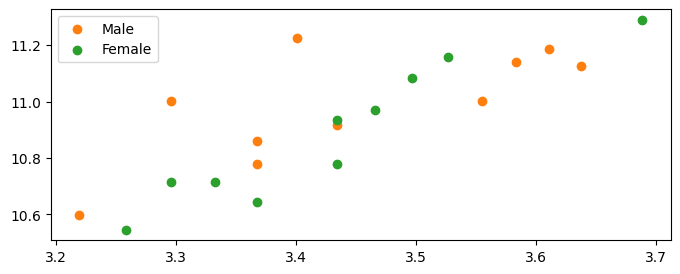

In [68]:
fig, ax = pl.subplots(figsize=(8, 3))
colours = ['tab:orange', 'tab:green']
for idx, (gender, gender_po) in enumerate(
    example_po.partition_by("gender", as_dict=True).items()):
    color = colours[idx]
    ax.scatter(x=gender_po["age"].log(),
               y=gender_po["salary"].log(),
               c=color, label=gender,)
ax.legend();

## `datatable`

In [69]:
!pip install datatable

In [70]:
import datatable as dt, math
from datatable import f, fread, ifelse, as_type

In [71]:
DT1 = dt.Frame(
    A=range(5), B=[1.7, 3.4, 0, None, -math.inf], stypes={"A": dt.int64})
DT2 = dt.Frame(example_pd)
# C0, C1, C2... as column names by default
# C0, C1, C2... como nombres de columnas por defecto
DT3 = dt.Frame(
    np.array([(1, 2, 1), (3, 4, 5), (6, 7, 6)], dtype=np.float32))
display(DT1), print(DT2.names), display(DT3)

,A,B
,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,0,1.7
1,1,3.4
2,2,0
3,3,NA
4,4,−inf


('id', 'name', 'position', 'department', 'age', 'gender', 'salary', 'start_date', 'email', 'phone')


,C0,C1,C2
,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,1,2,1
1,3,4,5
2,6,7,6


(None, None, None)

| Syntax              | Description                                      | Descripción |
|---------------------|--------------------------------------------------|- -------------------------------------------------|
| `f[:]`               | Select all columns                               |Seleccionar todas las columnas |
| `f[::-1]`            | Select all columns in reverse order              | Seleccionar todas las columnas en orden inverso |
| `f[:5]`              | Select the first 5 columns                       | Seleccione las primeras 5 columnas |
| `f[3:4]`             | Select the fourth column                          | Seleccione la cuarta columna |
| `f["B":"H"]`         | Select columns from B to H, inclusive             | Seleccione columnas de B a H, inclusive |
| `f[int]`             | Select all integer columns                        | Seleccionar todas las columnas de números enteros |
| `f[float]`           | Select all floating-point columns                 | Seleccionar todas las columnas de punto flotante |
| `f[dt.str32]`        | Select all columns with stype str32               | Seleccione todas las columnas con estilo str32 |
| `f[None]`            | Select no columns (empty columnset)               | No seleccionar columnas (conjunto de columnas vacío) |

In [72]:
# f-expressions => to the columns of a current frame
# expresiones f => para las columnas de un marco actual
ffilter = (f.C1 >= 4)
DT3[ffilter, :]

,C0,C1,C2
,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,3,4,5
1,6,7,6


In [73]:
fl = (f[int].extend(f[float]),          # integer and floating-point columns
                                        # # columnas de números enteros y de punto flotante
      f[:3].extend(f[-3:]),             # the first and the last 3 columns
                                        # las primeras y las últimas 3 columnas
      f.A.extend(f.B),                  # columns "A" and "B"
                                        # las columnas "A" y "B"
      f[str].extend(dt.str32(f[int])))  # string columns, and also all integer columns
                                        # converted to strings
                                        # columnas de cadenas, y también todas las columnas
                                        # de números enteros convertidas en cadenas
display(DT1[:, fl[2]])
display(DT2[:3, fl[0]])

,A,B
,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,0,1.7
1,1,3.4
2,2,0
3,3,NA
4,4,−inf


,age,salary
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,35,60000
1,28,45000
2,30,75000


In [74]:
pay = """
       ID|Charges|Payment_Method
       634-VHG|28|Cheque
       365-DQC|33.5|Credit card
       264-PPR|631|--
       845-AJO|42.3|
       789-KPO|56.9|Bank Transfer
       """
pay_dt = fread(pay, na_strings=['--', ''])
display(pay_dt)

,ID,Charges,Payment_Method
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,634-VHG,28,Cheque
1,365-DQC,33.5,Credit card
2,264-PPR,631,NA
3,845-AJO,42.3,NA
4,789-KPO,56.9,Bank Transfer


In [75]:
example_dt = fread('example.csv')
# SQL: "SELECT * FROM example_dt WHERE department = 'IT';"
display(example_dt[(f.department == 'IT'), :])
# SQL: "SELECT department, AVG(salary) AS average_salary
#       FROM example_dt GROUP BY department;"
display(example_dt[:, {"average_salary": dt.mean(f.salary),},
                   dt.by("department")])

,id,name,position,department,age,gender,salary,start_date,email,phone
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,f08,Mia Wilson,Network Administrator,IT,33,Female,65000,2017-08-05,mia.wilson@example.com,890-123-4567
1,f14,Natalie Rodriguez,Data Analyst,IT,31,Female,56000,2017-02-12,natalie.rodriguez@example.com,456-789-0123


,department,average_salary
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,Admin,41500
1,Customer Service,40000
2,Engineering,62333.3
3,Finance,64333.3
4,Human Resources,51000
5,IT,60500
6,Marketing,53666.7
7,Operations,69000
8,Project Management,70000


In [76]:
data = {'name': ['Tomas', 'Sophia', 'Mary', 'Daniel', 'Olivia', 'James', 'Barbara'],
        'age': [30, 41, 32, 67, 44, 52, 47],
        'rank': ['90%', '95%', '100%', '82%', '87%', '86%', '93%'],
        'age_': [30, 41, None, 67, None, 52, 47],
        'income': [10000, 8000, 5500, 6200, 12000, 7300, 11500]}
df1 = dt.Frame(data)
gender = {'Tomas': 'M', 'Sophia': 'F', 'Mary': 'F', 'Daniel': 'M',
          'Olivia': 'F', 'James': 'M', 'Barbara': 'F'}
gender_frame = dt.Frame({'name': list(gender.keys()),
                         'gender': list(gender.values())})
gender_frame.key = 'name'; df1 = df1[:, :, dt.join(gender_frame)]
surnames = {'Tomas': 'Murray', 'Sophia': 'Evans', 'Mary': 'Taylor', 'Daniel': 'Gilbert',
            'Olivia': 'Williams', 'James': 'Paterson', 'Barbara': 'Harrison'}
surname_frame = dt.Frame({'name': list(surnames.keys()),
                          'surname': list(surnames.values())})
surname_frame.key = 'name'; df1 = df1[:, :, dt.join(surname_frame)]
mean_income = df1[:, dt.mean(f.income)]
df1[:, dt.update(higher_income=f.income > mean_income)]
cond = ifelse((f.age < 50) & (f.income > 7500), True, False)
df1[:, dt.update(interview = cond)]
fcond = lambda give, amount: ifelse(give, f.income / f.age * amount, 0)
df1[:, dt.update(bonus = fcond(True, 6.5))]
df1[:, dt.update(year_bonus = f.bonus * 4)]
df1

,name,age,rank,age_,income,gender,surname,higher_income,interview,bonus,year_bonus
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪,▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,Tomas,30,90%,30,10000,M,Murray,1,1,2166.67,8666.67
1,Sophia,41,95%,41,8000,F,Evans,0,1,1268.29,5073.17
2,Mary,32,100%,NA,5500,F,Taylor,0,0,1117.19,4468.75
3,Daniel,67,82%,67,6200,M,Gilbert,0,0,601.493,2405.97
4,Olivia,44,87%,NA,12000,F,Williams,1,1,1772.73,7090.91
5,James,52,86%,52,7300,M,Paterson,0,0,912.5,3650
6,Barbara,47,93%,47,11500,F,Harrison,1,1,1590.43,6361.7


In [77]:
data = {'ID': ["x%d" % r for r in range(10)],
        'gender': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M'],
        'exam_year': ['2007', '2007', '2007', '2008', '2008',
                      '2008', '2008', '2009', '2009', '2009'],
        'class': ['algebra', 'stats', 'bio', 'algebra', 'algebra',
                  'stats', 'stats', 'algebra', 'bio', 'bio'],
        'participated': ['yes', 'yes', 'yes', 'yes', 'no',
                         'yes', 'yes', 'yes', 'yes', 'yes'],
        'employed': [True, True, True, False, False,
                     False, False, True, True, False],
        'grade': [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]}
df2 = dt.Frame(data)
cond = ifelse(f.grade > 50, 'yes', 'no')
df2[:, dt.update(passed = cond)]
display(df2[:, {"participated": dt.sum(f.participated == "yes"),
                "passed": dt.sum(f.passed == "yes"),
                "employed": dt.sum(f.employed),
                "grade": dt.mean(f.grade)},
            dt.by("exam_year")])
df2 = pd.DataFrame(data)
df2['passed'] = df2.apply(lambda row: row['grade'] > 50, axis=1)
display(df2.groupby('exam_year')\
           .agg({'participated': lambda x: x.value_counts()['yes'],
                 'passed': lambda x: sum(x == 'yes'),
                 'employed': lambda x: sum(x),
                 'grade': lambda x: sum(x) / len(x)}))

,exam_year,participated,passed,employed,grade
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,2007,3,2,3,74
1,2008,3,3,0,68.5
2,2009,3,2,2,60.6667


,participated,passed,employed,grade
exam_year,,,,
2007,3,0,3,74.000000
2008,3,0,0,68.500000
2009,3,0,2,60.666667


`datatable => plotly & matplotlib`

In [78]:
d = {'A': sorted(random_list(start=100, end=101, seed=14, choice='float')),
     'B': random_list(start=100, end=101, seed=15, choice='float')}
df_dt = dt.Frame(d)
px.line(x=df_dt[:, "A"].to_list()[0], y=df_dt[:, "B"].to_list()[0])

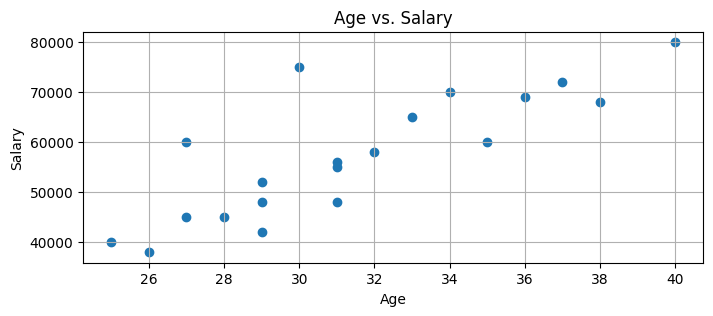

In [79]:
fig, ax = pl.subplots(figsize=(8, 3))
ax.scatter(example_dt[:, "age"].to_list()[0],
           example_dt[:, "salary"].to_list()[0])
pl.xlabel("Age"); pl.ylabel("Salary")
pl.title("Age vs. Salary"); pl.grid();

## `vaex`
- [Example #1](https://nbviewer.org/github/vaexio/vaex-examples/blob/master/medium-airline-data-eda/airlines-EDA.ipynb)
- [Example #2](https://github.com/vaexio/vaex-talks/tree/master/2022-pydata-global)

In [80]:
%pip install -q vaex

In [81]:
import vaex

In [82]:
x = random_list(start=25, end=25, seed=16, choice=['int', 'float', 'chr'])
y = random_list(start=25, end=25, seed=13, choice=['int', 'float'])
z = random_list(start=25, end=25, seed=10, choice=['chr'])
df = vaex.from_arrays(x=x, y=y, z=z)
display(df.head(7)); display(df.describe(selection=df.y>25))

#,x,y,z
0,48.0480665601294,68.5258,m
1,22.66446832325999,83,f
2,52,85,v
3,s,28,a
4,81,16,i
5,1,68,y
6,30.20437047996458,95,b


,x,y,z
data_type,string,float64,string
count,21,21,21
NA,4,4,4
mean,--,60.446604148224196,--
std,--,22.303715,--
min,--,25.331176,--
max,--,95.0,--


In [83]:
for i1, i2, chunk in df.evaluate_iterator(df.y, chunk_size=5):
    print(f"id from {i1} to {i2-1}: sum y = {chunk.sum()}")

id from 0 to 4: sum y = 280.52579929645367
id from 5 to 9: sum y = 287.9973979529592
id from 10 to 14: sum y = 285.14259055294997
id from 15 to 19: sum y = 300.02956250782415
id from 20 to 24: sum y = 164.9433979555402


In [84]:
data = {'name': ['Tomas', 'Sophia', 'Mary', 'Daniel', 'Olivia', 'James', 'Barbara'],
        'age': [30, 41, 32, 67, 44, 52, 47],
        'rank': ['90%', '95%', '100%', '82%', '87%', '86%', '93%'],
        'age_': [30, 41, None, 67, None, 52, 47],
        'income': [10000, 8000, 5500, 6200, 12000, 7300, 11500],
        'gender': list('MFFMFMF')}
df1 = vaex.from_dict(data)
# a virtual column (computed on the fly)
# una columna virtual (calculada sobre la marcha)
df1['bonus'] = 6.5 * df1.income  / df1.age
# turn columns into the native CPU format for optimal performance at memory cost
# convierta las columnas al formato nativo de la CPU para
# obtener un rendimiento óptimo con un coste de memoria
df1 = df1.materialize('bonus')
display(df1); display(df1['bonus'])
@vaex.register_function()
def year_bonus(bonus):
    return bonus * 4
display(df1.bonus.year_bonus())

#,name,age,rank,age_,income,gender,bonus
0,Tomas,30,90%,30,10000,M,2166.67
1,Sophia,41,95%,41,8000,F,1268.29
2,Mary,32,100%,None,5500,F,1117.19
3,Daniel,67,82%,67,6200,M,601.493
4,Olivia,44,87%,None,12000,F,1772.73
5,James,52,86%,52,7300,M,912.5
6,Barbara,47,93%,47,11500,F,1590.43


Expression = bonus
Length: 7 dtype: float64 (column)
---------------------------------
0  2166.67
1  1268.29
2  1117.19
3  601.493
4  1772.73
5    912.5
6  1590.43

Expression = year_bonus(bonus)
Length: 7 dtype: float64 (expression)
-------------------------------------
0  8666.67
1  5073.17
2  4468.75
3  2405.97
4  7090.91
5     3650
6   6361.7

In [85]:
@vaex.register_function(as_property=True)
def interview_property(age, income):
    result = []
    for a, i in zip(age.tolist(), income.tolist()):
        result.append((a < 50) & (i > 7500))
    return np.array(result)
# add a visible column / agregar una columna visible
# df1['interview'] = (df1.age < 50) & (df1.income > 7500)
# add a custom property / agregar una propiedad personalizada
df1.interview = df1.func.interview_property(df1.age, df1.income)
display(df1); display(df1.interview);

#,name,age,rank,age_,income,gender,bonus
0,Tomas,30,90%,30,10000,M,2166.67
1,Sophia,41,95%,41,8000,F,1268.29
2,Mary,32,100%,None,5500,F,1117.19
3,Daniel,67,82%,67,6200,M,601.493
4,Olivia,44,87%,None,12000,F,1772.73
5,James,52,86%,52,7300,M,912.5
6,Barbara,47,93%,47,11500,F,1590.43


Expression = interview_property(age, income)
Length: 7 dtype: bool (expression)
----------------------------------
0   True
1   True
2  False
3  False
4   True
5  False
6   True

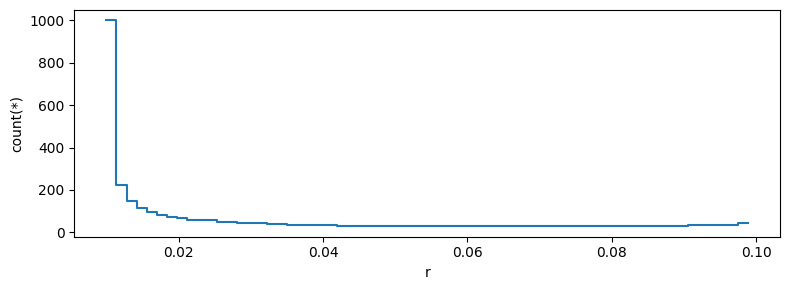

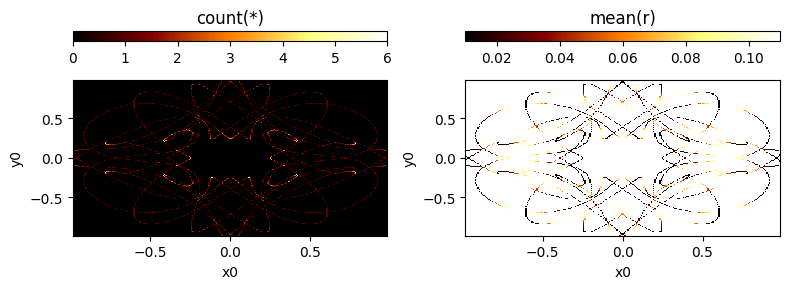

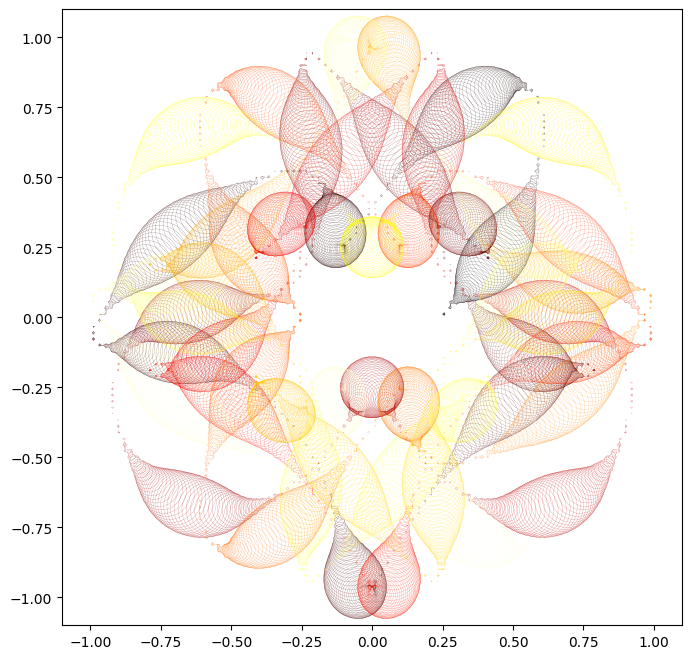

In [86]:
x = np.linspace(-1.1, 1.1, 100)
y = np.linspace(-1.1, 1.1, 100)
X, Y = np.meshgrid(x, y)
k = np.array(range(1, 10000, 2))
x0 = np.cos(14*np.pi*k/10**4)*(1-.75*(np.cos(20*np.pi*k/10**4))**2)
y0 = np.sin(14*np.pi*k/10**4)*(1-.75*(np.cos(24*np.pi*k/10**4))**2)
r = 10**(-2)+.1*np.sin(54*np.pi*k/10**4)**6
F = np.array([(X-x0[(i-1)//2])**2+(Y-y0[(i-1)//2])**2-r[(i-1)//2]**2
              for i in k])
df_va = vaex.from_arrays(k=k, x0=x0, y0=y0, r=r, F=F)
pl.figure(figsize=(8, 3))
df_va.viz.histogram(df_va.r, limits='75.%');
pl.figure(figsize=(8, 3))
df_va.viz.heatmap(
    [["x0", "y0"]], what=["count(*)", "mean(r)"],
    selection=["-1.2 < r < 1.2"], limits='99%');
fig = pl.figure(figsize=(8, 8))
ax = fig.add_subplot()
for i in range(5000):
    ax.contour(X, Y, F[i], [0],
               colors=[pl.cm.hot(i/5000)[:3]], linewidths=.1);
ax.set_xlim((-1.1, 1.1)); ax.set_ylim((-1.1, 1.1));

In [87]:
# huge datasets
taxi = vaex.open('s3://vaex/taxi/yellow_taxi_2015_f32s.hdf5?anon=true')
taxi.shape

(146112991, 18)

In [91]:
taxi['fare_by_distance'] = (taxi.fare_amount / taxi.trip_distance)
taxi[['pickup_datetime','dropoff_datetime','fare_by_distance']].head(3)

#,pickup_datetime,dropoff_datetime,fare_by_distance
0,2014-12-16 02:26:00.000000000,2014-12-16 02:28:00.000000000,4.58716
1,2014-12-15 18:23:00.000000000,2014-12-15 18:58:00.000000000,nan
2,2015-01-15 19:05:39.000000000,2015-01-15 19:23:42.000000000,7.54717


In [92]:
taxi[taxi.trip_distance>0].fare_by_distance.mean(progress='widget')

array(6.5138502)

In [93]:
counts_geo = taxi.count(
    binby=[taxi.pickup_longitude, taxi.pickup_latitude],
    shape=256, limits=[[-74.37, -73.54], [40.49, 40.92]], progress='widget')

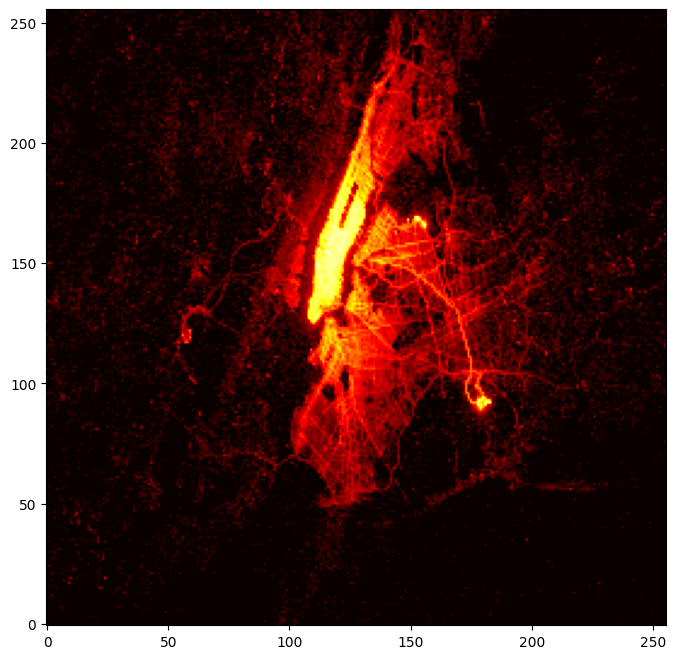

In [96]:
pl.figure(figsize=(8, 8))
pl.imshow(np.log1p(counts_geo).T, origin='lower', cmap='hot', aspect='auto');

## `CuPy vs NumPy`
[Differences between CuPy and NumPy](https://docs.cupy.dev/en/stable/user_guide/difference.html)

In [ ]:
import cupy as cp

In [ ]:
x_cpu, x_gpu = np.array([1, 2, 3]), cp.array([1, 2, 3])
y_cpu, y_gpu = np.array([4, 5, 6]), cp.array([4, 5, 6])
(x_cpu + y_cpu, x_gpu + y_gpu,
 x_cpu + cp.asnumpy(y_gpu), x_gpu + cp.asarray(y_cpu))

(array([5, 7, 9]), array([5, 7, 9]), array([5, 7, 9]), array([5, 7, 9]))

In [ ]:
(np.array([-1], dtype=np.float32).astype(np.uint32),
 cp.array([-1], dtype=np.float32).astype(np.uint32),
 np.array([float('inf')], dtype=np.float32).astype(np.int32),
 cp.array([float('inf')], dtype=np.float32).astype(np.int32))

(array([4294967295], dtype=uint32),
 array([0], dtype=uint32),
 array([-2147483648], dtype=int32),
 array([2147483647], dtype=int32))

In [ ]:
np_rand = np.array(np.random.randn())
cp_rand = cp.random.randn(dtype=np.float32)
np_rand.dtype, cp_rand

(dtype('float64'), array(-0.00376242, dtype=float32))